In [1]:
import tensorflow as tf
import tflearn
from tflearn.layers.conv import conv_2d,max_pool_2d
from tflearn.layers.core import input_data,dropout,fully_connected
from tflearn.layers.estimator import regression
import scipy.io
import numpy as np
import matplotlib.pyplot as pyplot
from PIL import Image
import matplotlib.cm as cm
from pprint import pprint
import Image

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.reset_default_graph()
convnet=input_data(shape=[None,20,20,1],name='input')
convnet=conv_2d(convnet,32,2,activation='relu')
convnet=max_pool_2d(convnet,2)
convnet=conv_2d(convnet,64,2,activation='relu')
convnet=max_pool_2d(convnet,2)

convnet=conv_2d(convnet,128,2,activation='relu')
convnet=max_pool_2d(convnet,2)

convnet=conv_2d(convnet,256,2,activation='relu')
convnet=max_pool_2d(convnet,2)

convnet=conv_2d(convnet,128,2,activation='relu')
convnet=max_pool_2d(convnet,2)

convnet=conv_2d(convnet,64,2,activation='relu')
convnet=max_pool_2d(convnet,2)

convnet=fully_connected(convnet,1024,activation='relu')
convnet=dropout(convnet,0.8)

convnet=fully_connected(convnet,10,activation='softmax')

convnet=regression(convnet,optimizer='adam',learning_rate=0.002,loss='categorical_crossentropy',name='regression')

model=tflearn.DNN(convnet,tensorboard_verbose=0)


Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [3]:
model.load("cnn_model.tfl")

INFO:tensorflow:Restoring parameters from /home/sparsha/gitprojects/Handwritten number recognition/cnn_model.tfl


Newline




/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  # This is added back by InteractiveShellApp.init_path()


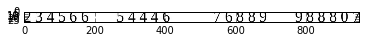

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in long_scalars


The number is : -1046852448373814585
Newline




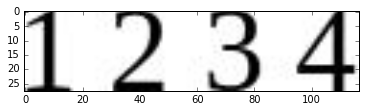

The number is : 12324


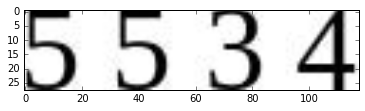

The number is : 5534


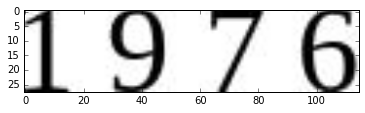

The number is : 1976


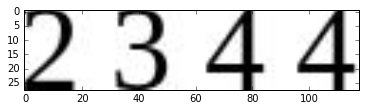

The number is : 2344


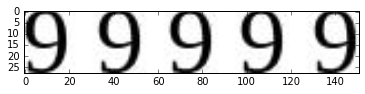

The number is : 99999


In [8]:
import Character_Segmenter_Utilities as charseg
import Line_Segmenter_Utilities as lineseg
import WordSegmenterUtilities as wordseg

lineseg.image_arr=[]
lines_arr=lineseg.main('tempo.png')

for k in lines_arr:
    print("Newline\n\n")
    
    scipy.misc.imsave('temp0.jpg', np.matrix(k))
    words=wordseg.main('temp0.jpg')
    for w in words:
        pyplot.imshow(w,cmap=cm.gray)
        pyplot.show()
        charseg.image_arr=[]
        scipy.misc.imsave('temp1.jpg', np.matrix(w))

        arr=charseg.main('temp1.jpg')
        number=0
        for i in arr:
            img=np.matrix(i)
            img=255-img
            img=img/255.0
            img=img.transpose()
            f=np.array(img)
            f=f.reshape(20,20,1)
            p=model.predict([f])
            p=np.argmax(p)
            if p==9:
                p=0
            else:
                p=p+1
            number=number*10+p
        print('The number is : '+str(number))

